# A Machine Learning approach to classify the chest X Rays of Healthy vs Pneumonia (Corona) affected patients

In [336]:
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image 
import numpy as np
import shutil
import os

In [337]:
IMG_SIZE=100

In [338]:
def loadTrain():
    train_data = []
    train_y = []
    y = ""
    for subdir in os.listdir("dataset_labeled/train"):
        print(subdir)
        y = subdir
        for fileName in os.listdir("dataset_labeled/train/" + subdir):
            img = Image.open("dataset_labeled/train/" + subdir + "/" + fileName)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img),y])
    np.random.shuffle(train_data)
    return train_data

def loadTest():
    test_data = []
    test_y = []
    y = ""
    for subdir in os.listdir("dataset_labeled/test"):
        y = subdir
        for fileName in os.listdir("dataset_labeled/test/" + subdir):
            img = Image.open("dataset_labeled/test/" + subdir + "/" + fileName)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img),y])
    np.random.shuffle(test_data)
    return test_data

In [339]:
train = loadTrain()

Pnemonia-Streptococcus-bacteria
Normal-nan-nan
Pnemonia-nan-Virus
Pnemonia-SARS-Virus
Pnemonia-COVID-19-Virus
Pnemonia-ARDS-Stress-Smoking
Pnemonia-nan-bacteria


In [340]:
test = loadTest()

In [341]:
def detach(array):
    x = []
    y = []
    for row in array:
        x.append(row[0])
        y.append(row[1])
    return(x,y)

In [342]:
(x_train,y_train) = detach(train)
(x_test,y_test) = detach(test)

In [343]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse=False)

y = np.array(y_test + y_train)
y = np.array(y).reshape(len(y), 1)
onehot_encoder.fit(y)

y_train_encoded = np.array(y_train).reshape(len(y_train), 1)
y_train_encoded = onehot_encoder.transform(y_train_encoded)


y_test_encoded = np.array(y_test).reshape(len(y_test), 1)
y_test_encoded = onehot_encoder.transform(y_test_encoded)


print(y_train_encoded)
print(y_test_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


[0. 0. 0. 0. 0. 0. 1.]


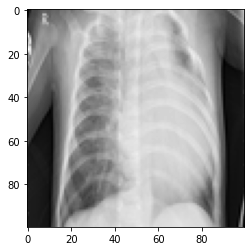

In [344]:
plt.imshow(x_train[0], cmap = 'gist_gray')
print(y_train_encoded[0])

Normal-nan-nan


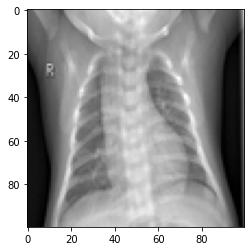

In [345]:
plt.imshow(x_test[4], cmap = 'gist_gray')
print(y_test[4])

In [346]:
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [347]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K

In [348]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (IMG_SIZE, IMG_SIZE, 1))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 

model.add(Dense(32)) 
model.add(Activation('relu')) 

model.add(Dense(16)) 
model.add(Activation('relu')) 

model.add(Dense(7)) 
model.add(Activation('softmax')) 
  
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 


model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 99, 99, 32)        160       
_________________________________________________________________
activation_76 (Activation)   (None, 99, 99, 32)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 48, 48, 32)        4128      
_________________________________________________________________
activation_77 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 23, 23, 64)      

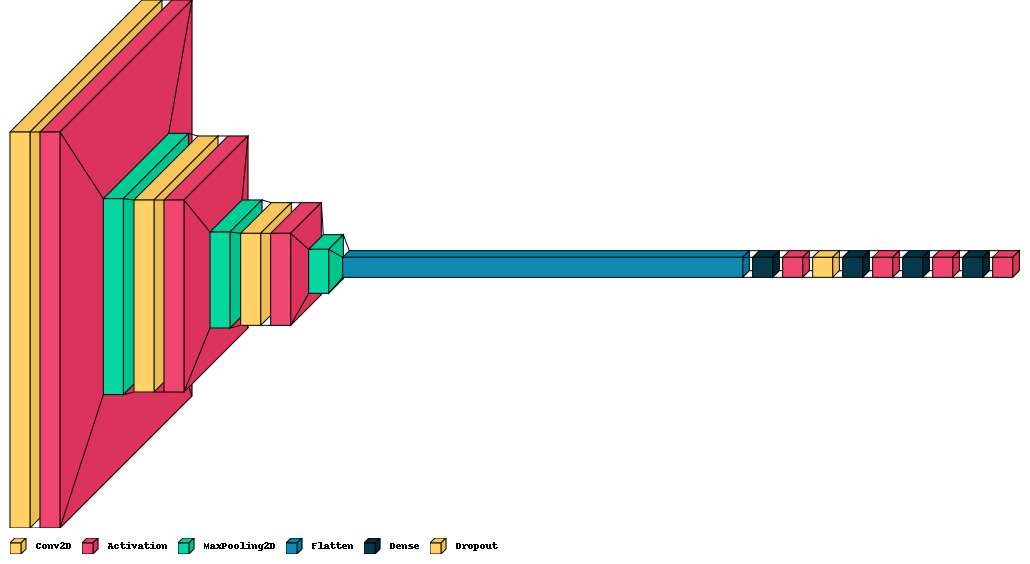

In [349]:
import visualkeras
visualkeras.layered_view(model, legend=True)

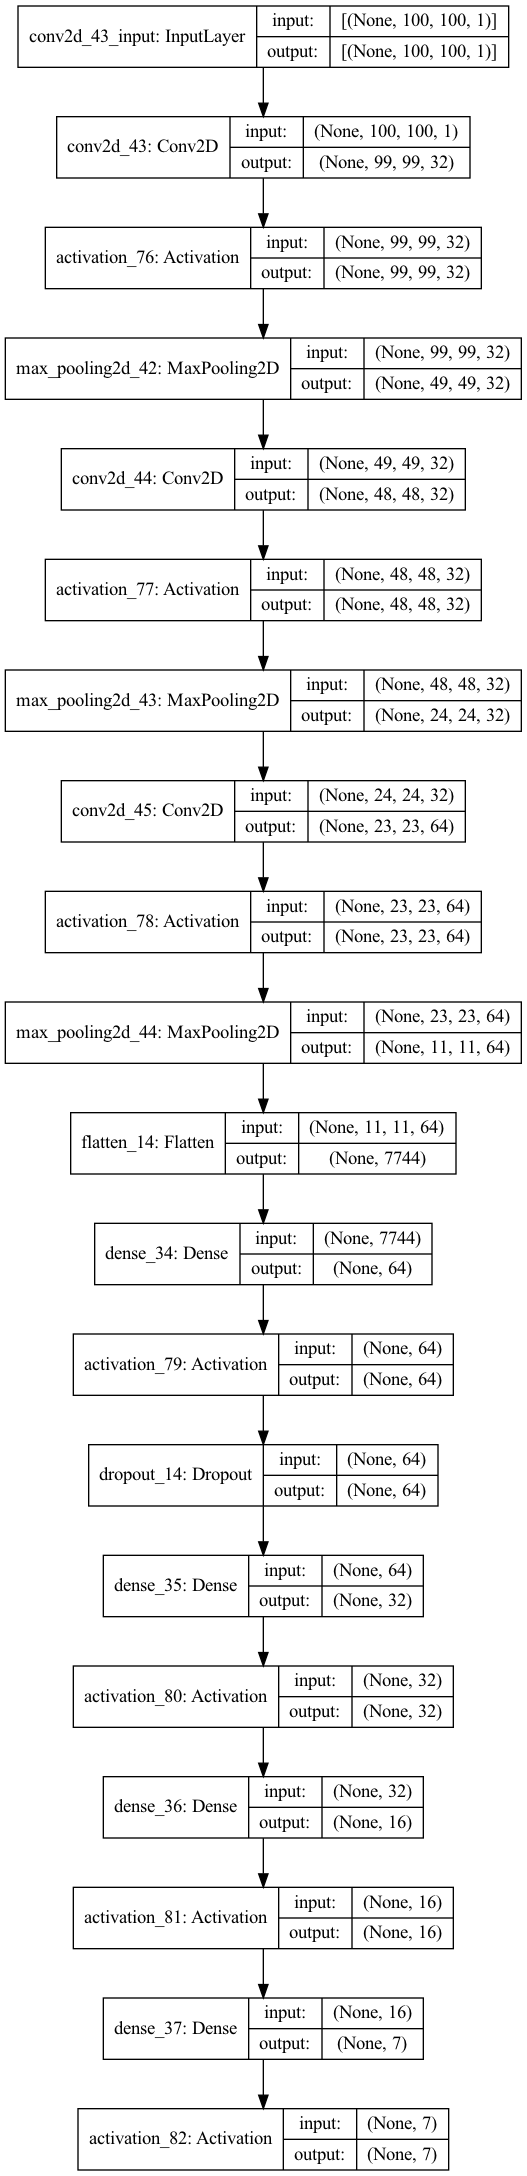

In [350]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='output/model_graph.png', show_shapes=True, show_layer_names=True)

In [351]:
x_train = x_train.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE, 1)
input_shape = (IMG_SIZE, IMG_SIZE, 1)


In [352]:
history = model.fit([x_train], y_train_encoded, epochs = 15, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/15
132/132 [==============================] - 19s 133ms/step - loss: 0.3065 - accuracy: 0.4576 - val_loss: 0.2262 - val_accuracy: 0.6746
Epoch 2/15
132/132 [==============================] - 17s 128ms/step - loss: 0.2130 - accuracy: 0.6646 - val_loss: 0.1779 - val_accuracy: 0.7040
Epoch 3/15
132/132 [==============================] - 17s 128ms/step - loss: 0.1838 - accuracy: 0.7069 - val_loss: 0.1748 - val_accuracy: 0.7514
Epoch 4/15
132/132 [==============================] - 17s 130ms/step - loss: 0.1709 - accuracy: 0.7235 - val_loss: 0.1718 - val_accuracy: 0.7030
Epoch 5/15
132/132 [==============================] - 17s 130ms/step - loss: 0.1634 - accuracy: 0.7413 - val_loss: 0.1495 - val_accuracy: 0.7628
Epoch 6/15
132/132 [==============================] - 18s 134ms/step - loss: 0.1561 - accuracy: 0.7517 - val_loss: 0.1454 - val_accuracy: 0.7732
Epoch 7/15
132/132 [==============================] - 17s 131ms/step - loss: 0.1508 - accuracy: 0.7558 - val_loss: 0.1435 - val_ac

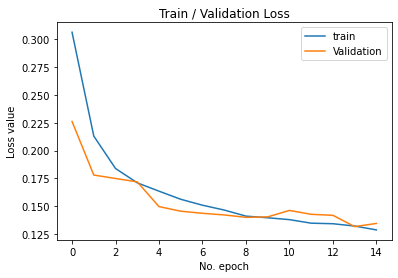

In [353]:
import matplotlib.pyplot as plt


# Plot history: Accuracy
plt.title('Train / Validation Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend()
plt.savefig("output/tran-val-loss.png")
plt.show()

In [354]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

In [355]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
print("accuracy_score: " + str(acc))

accuracy_score: 0.6858475894245724


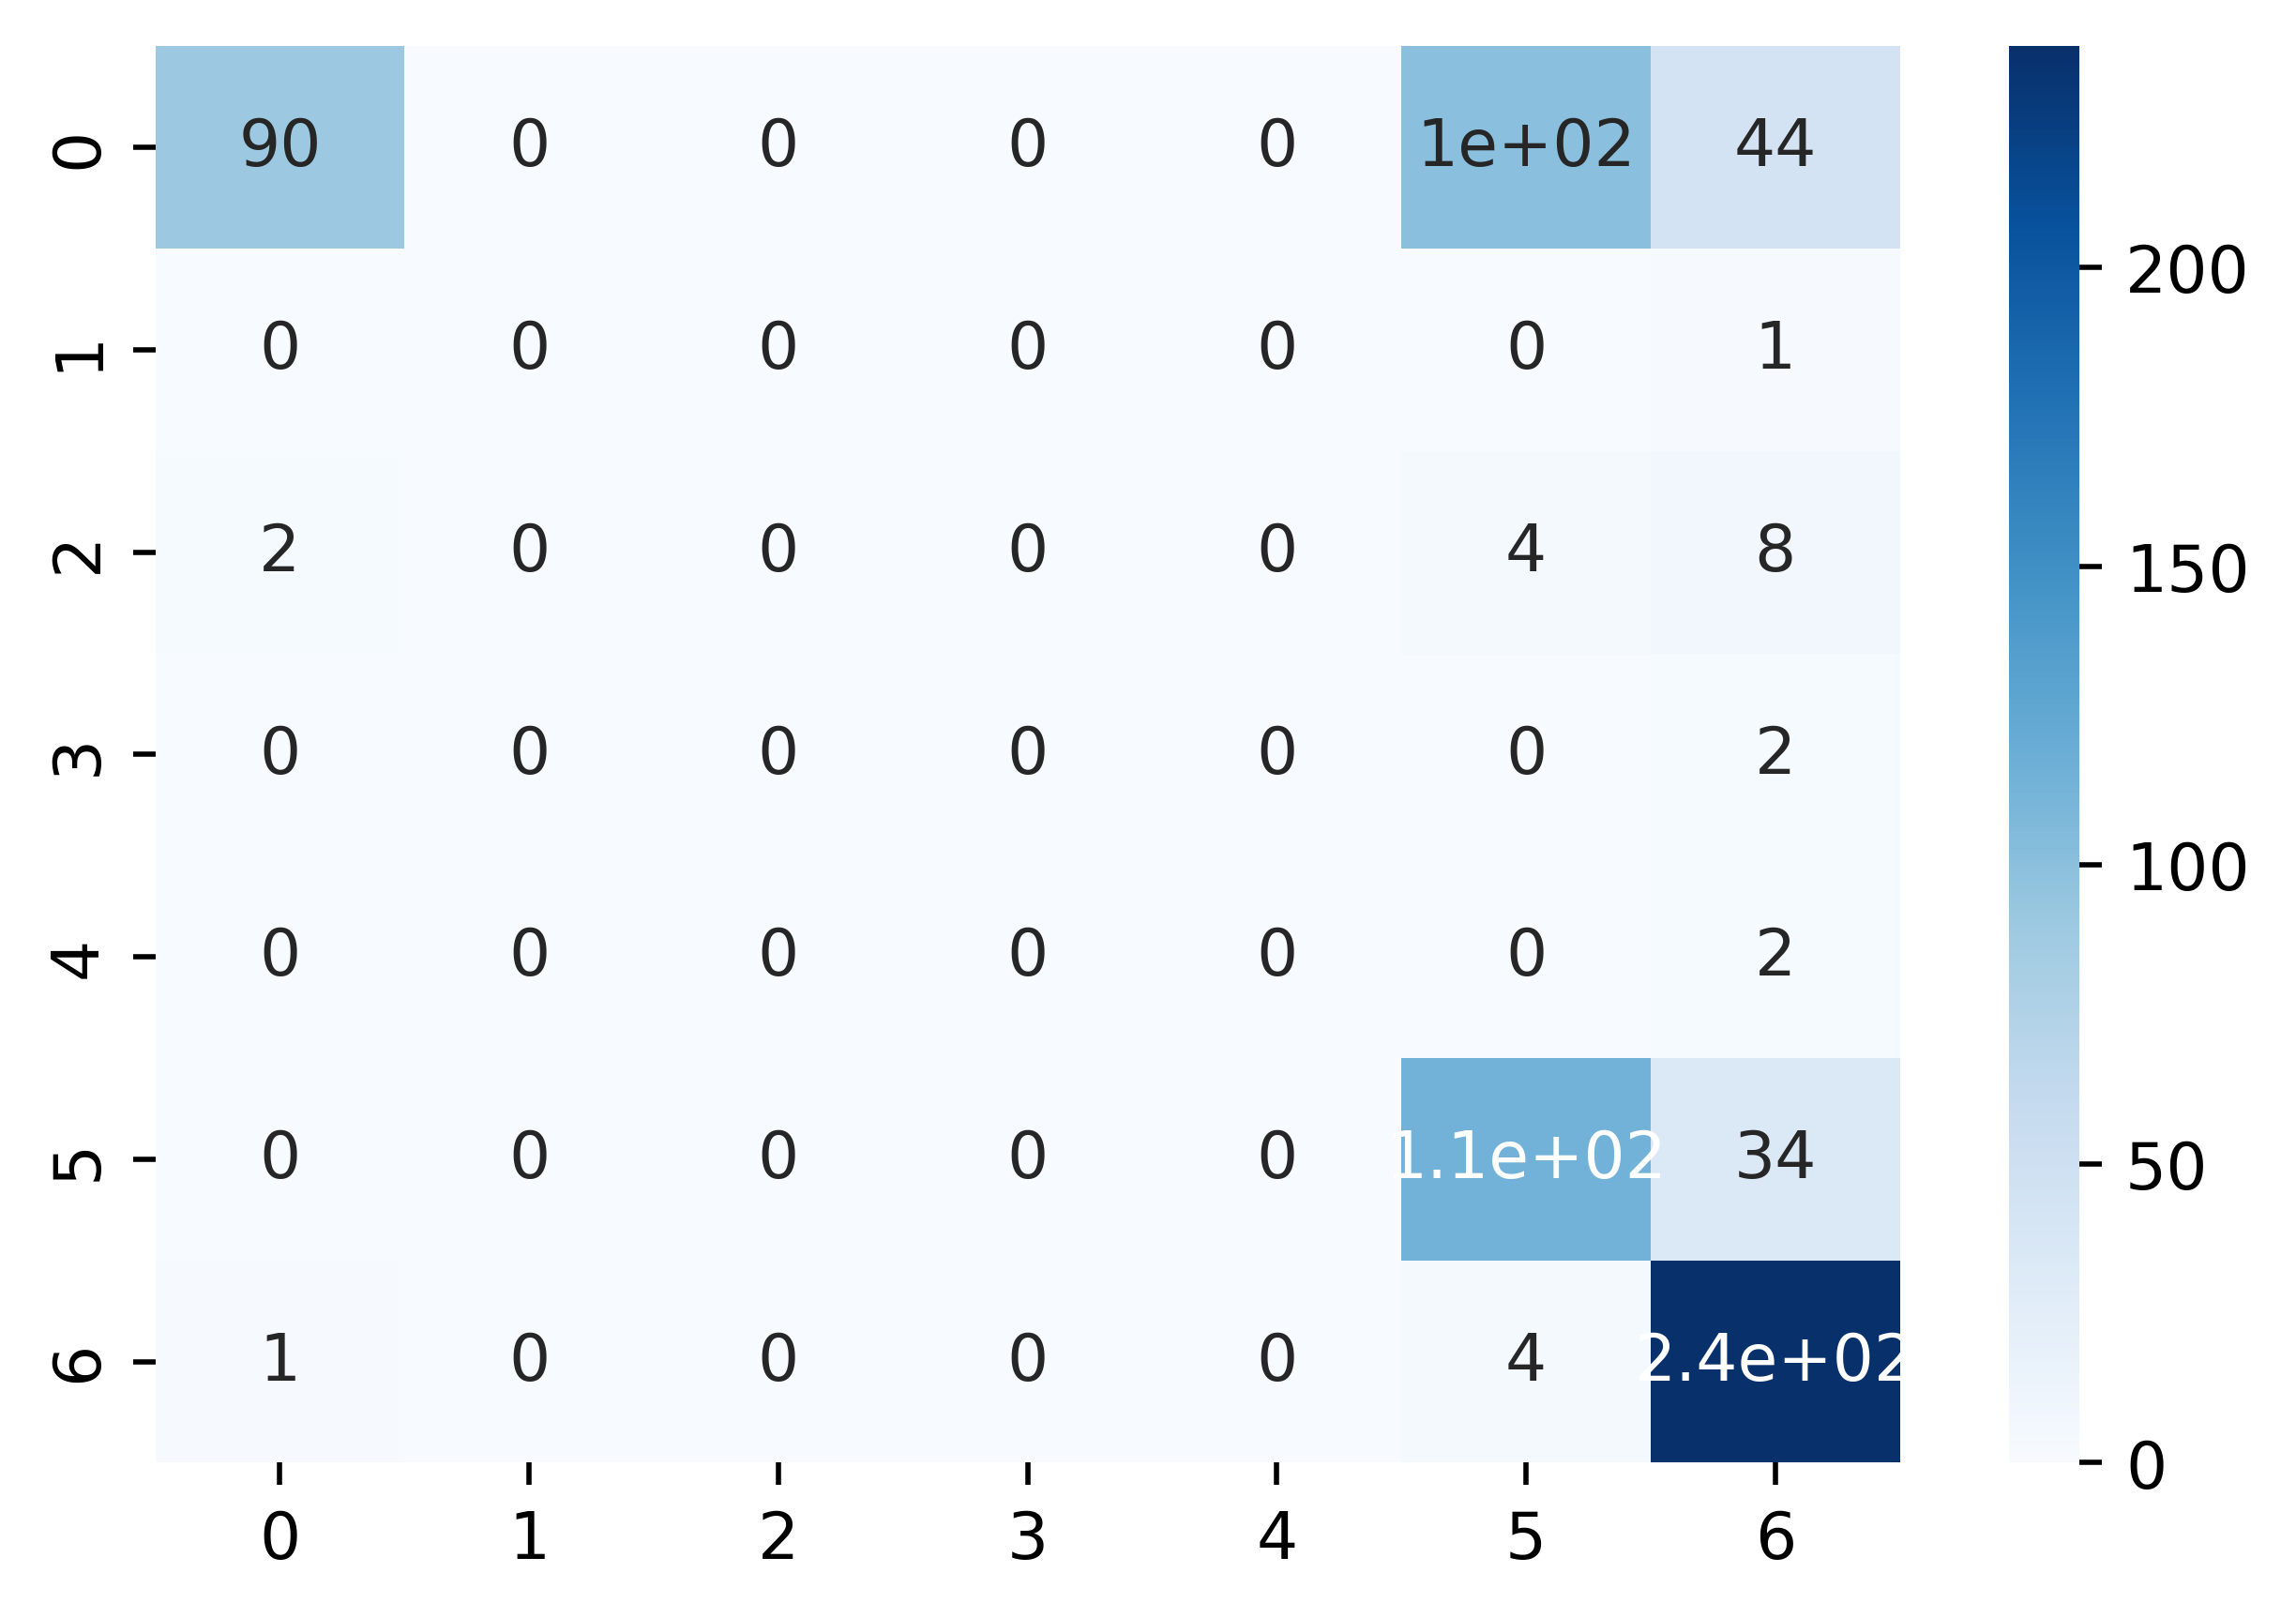

In [356]:
from sklearn.metrics import confusion_matrix
mx = confusion_matrix(y_test, y_predict)
import seaborn as sns
plt.figure( dpi=500)
sns.heatmap(mx, annot=True, cmap="Blues")
plot_path = os.path.join("output/confusion_matrix.png")
plt.savefig(plot_path)